In [1]:
import os
import numpy as np
import pandas as pd
import csv
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Ignoring warning messages in output
import warnings
warnings.filterwarnings('ignore')

In [2]:
TuEyeQ_y = []
TuEyeQ_X = []

with open('TuEyeQ_X.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            TuEyeQ_X.append(row)
TuEyeQ_X = [[float(s) for s in sublist] for sublist in TuEyeQ_X]

with open('TuEyeQ_y.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            TuEyeQ_y.append(row)
TuEyeQ_y = [[int(s) for s in sublist] for sublist in TuEyeQ_y]
TuEyeQ_y = [s[0] for s in TuEyeQ_y]

In [3]:
Doves_y = []
Doves_X = []

with open('Doves_Features_X.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            Doves_X.append(row)
Doves_X = [[float(s) for s in sublist] for sublist in Doves_X]

with open('Doves_Features_y.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in reader:
        if row == []:
            pass
        else:
            Doves_y.append(row)
Doves_y = [[int(s) for s in sublist] for sublist in Doves_y]
Doves_y = [s[0] for s in Doves_y]

In [4]:
# Patch, remove when i get around to fixing it properly
Doves_X = np.nan_to_num(Doves_X)
TuEyeQ_X = np.nan_to_num(TuEyeQ_X)

Doves_X = Doves_X.tolist()
TuEyeQ_X = TuEyeQ_X.tolist()

### Classification (train on Doves, test on TuEyeQ)

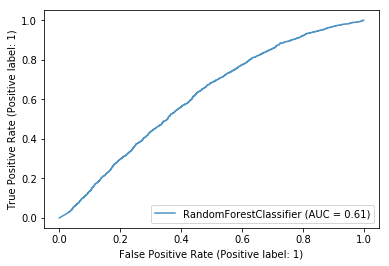

In [5]:
# RFC

train_X = Doves_X
train_y = Doves_y
test_X = TuEyeQ_X
test_y = TuEyeQ_y

model = RandomForestClassifier(
    n_estimators=1000, criterion='entropy', min_samples_split=5,
    min_samples_leaf=1, random_state=42, max_features='sqrt'
)

model.fit(train_X, train_y)
pred_values = model.predict(test_X)
multi_doves_pred = pred_values
multi_doves_truey = test_y

rfc_acc_score = accuracy_score(test_y, pred_values)
rfc_f1_score = f1_score(test_y, pred_values)
rfc_recall_score = recall_score(test_y, pred_values)
rfc_precision_score = precision_score(test_y, pred_values)

ax = plt.gca()
rfc_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)

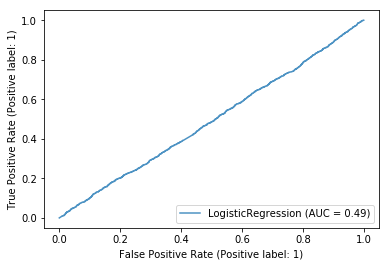

In [6]:
# LR

model = LogisticRegression(
    random_state=42
)

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

lr_acc_score = accuracy_score(test_y, pred_values)
lr_f1_score = f1_score(test_y, pred_values)
lr_recall_score = recall_score(test_y, pred_values)
lr_precision_score = precision_score(test_y, pred_values)

ax = plt.gca()
lr_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)

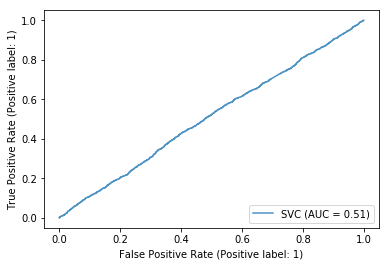

In [7]:
# SVM

model = svm.SVC(
    decision_function_shape='ovo'
)

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

svm_acc_score = accuracy_score(test_y, pred_values)
svm_f1_score = f1_score(test_y, pred_values)
svm_recall_score = recall_score(test_y, pred_values)
svm_precision_score = precision_score(test_y, pred_values)

ax = plt.gca()
svm_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)


RF classifier results:
Acc. = 0.49862637362637363
F1 = 0.049479166666666664
Recall = 0.0260989010989011
Precision = 0.475

LR classifier results:
Acc. = 0.49107142857142855
F1 = 0.45131432802665683
Recall = 0.4186126373626374
Precision = 0.4895582329317269

SVM classifier results:
Acc. = 0.5
F1 = 0.0
Recall = 0.0
Precision = 0.0

Dummy classifier results:
Acc. = 0.5
F1 = 0.0
Recall = 0.0
Precision = 0.0



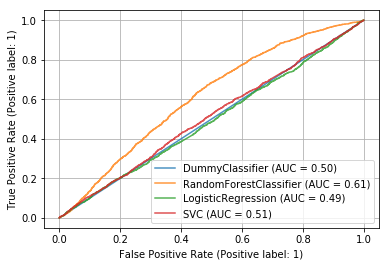

In [8]:
# Dummy

model = DummyClassifier(strategy="most_frequent")

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

d_acc_score = accuracy_score(test_y, pred_values)
d_f1_score = f1_score(test_y, pred_values)
d_recall_score = recall_score(test_y, pred_values)
d_precision_score = precision_score(test_y, pred_values)

plt.grid()
ax = plt.gca()
d_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
lr_disp.plot(ax=ax, alpha=0.8)
svm_disp.plot(ax=ax, alpha=0.8)

print(f"""
RF classifier results:
Acc. = {rfc_acc_score}
F1 = {rfc_f1_score}
Recall = {rfc_recall_score}
Precision = {rfc_precision_score}

LR classifier results:
Acc. = {lr_acc_score}
F1 = {lr_f1_score}
Recall = {lr_recall_score}
Precision = {lr_precision_score}

SVM classifier results:
Acc. = {svm_acc_score}
F1 = {svm_f1_score}
Recall = {svm_recall_score}
Precision = {svm_precision_score}

Dummy classifier results:
Acc. = {d_acc_score}
F1 = {d_f1_score}
Recall = {d_recall_score}
Precision = {d_precision_score}
""")

### Classification (train on TuEyeQ, test on Doves)

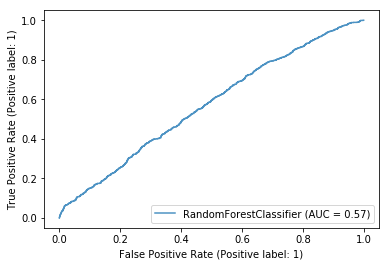

In [9]:
# RFC

test_X = Doves_X
test_y = Doves_y
train_X = TuEyeQ_X
train_y = TuEyeQ_y

model = RandomForestClassifier(
    n_estimators=1000, criterion='entropy', min_samples_split=5,
    min_samples_leaf=1, random_state=42, max_features='sqrt'
)

model.fit(train_X, train_y)
pred_values = model.predict(test_X)
multi_tueye_pred = pred_values
multi_tueye_truey = test_y

rfc_acc_score = accuracy_score(test_y, pred_values)
rfc_f1_score = f1_score(test_y, pred_values)
rfc_recall_score = recall_score(test_y, pred_values)
rfc_precision_score = precision_score(test_y, pred_values)

ax = plt.gca()
rfc_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)

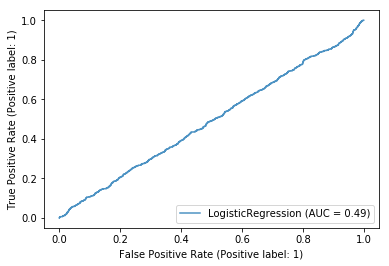

In [10]:
# LR

model = LogisticRegression(
    random_state=42
)

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

lr_acc_score = accuracy_score(test_y, pred_values)
lr_f1_score = f1_score(test_y, pred_values)
lr_recall_score = recall_score(test_y, pred_values)
lr_precision_score = precision_score(test_y, pred_values)

ax = plt.gca()
lr_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)

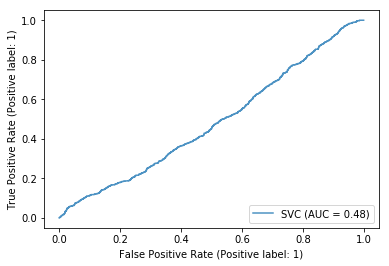

In [11]:
# SVM

model = svm.SVC(
    decision_function_shape='ovo'
)

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

svm_acc_score = accuracy_score(test_y, pred_values)
svm_f1_score = f1_score(test_y, pred_values)
svm_recall_score = recall_score(test_y, pred_values)
svm_precision_score = precision_score(test_y, pred_values)

ax = plt.gca()
svm_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)


RF classifier results:
Acc. = 0.6206896551724138
F1 = 0.0
Recall = 0.0
Precision = 0.0

LR classifier results:
Acc. = 0.6124957323318538
F1 = 0.10134600158353127
Recall = 0.0576057605760576
Precision = 0.42105263157894735

SVM classifier results:
Acc. = 0.6206896551724138
F1 = 0.0
Recall = 0.0
Precision = 0.0

Dummy classifier results:
Acc. = 0.6206896551724138
F1 = 0.0
Recall = 0.0
Precision = 0.0



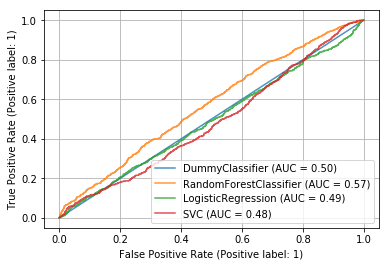

In [12]:
# Dummy

model = DummyClassifier(strategy="most_frequent")

model.fit(train_X, train_y)
pred_values = model.predict(test_X)

d_acc_score = accuracy_score(test_y, pred_values)
d_f1_score = f1_score(test_y, pred_values)
d_recall_score = recall_score(test_y, pred_values)
d_precision_score = precision_score(test_y, pred_values)

plt.grid()
ax = plt.gca()
d_disp = plot_roc_curve(model, test_X, test_y, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
lr_disp.plot(ax=ax, alpha=0.8)
svm_disp.plot(ax=ax, alpha=0.8)

print(f"""
RF classifier results:
Acc. = {rfc_acc_score}
F1 = {rfc_f1_score}
Recall = {rfc_recall_score}
Precision = {rfc_precision_score}

LR classifier results:
Acc. = {lr_acc_score}
F1 = {lr_f1_score}
Recall = {lr_recall_score}
Precision = {lr_precision_score}

SVM classifier results:
Acc. = {svm_acc_score}
F1 = {svm_f1_score}
Recall = {svm_recall_score}
Precision = {svm_precision_score}

Dummy classifier results:
Acc. = {d_acc_score}
F1 = {d_f1_score}
Recall = {d_recall_score}
Precision = {d_precision_score}
""")

### Classification (test on scrambled set)

In [13]:
import random

X_comb = Doves_X
y_comb = Doves_y

X_comb.extend(TuEyeQ_X)
y_comb.extend(TuEyeQ_y)

shuffler = list(zip(X_comb, y_comb))

random.shuffle(shuffler)

X_comb, y_comb = zip(*shuffler)

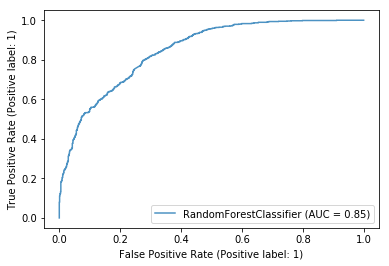

In [14]:
# Random Forest

X = np.array(X_comb)
y = np.array(y_comb)

model = RandomForestClassifier(
    n_estimators=1000, criterion='entropy', min_samples_split=5,
    min_samples_leaf=1, random_state=42, max_features='sqrt'
)

acc_score = []
f1 = []
recall = []
precision = []

k = 5
kf = KFold(n_splits=k, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    multi_scrambled_pred = pred_values
    multi_scrambled_truey = y_test
    
    acc_score.append(accuracy_score(y_test, pred_values))
    f1.append(f1_score(y_test, pred_values))
    precision.append(precision_score(y_test, pred_values))
    recall.append(recall_score(y_test, pred_values))

ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
    
rfc_avg_acc_score = sum(acc_score)/k
rfc_avg_f1_score = sum(f1)/k
rfc_avg_recall = sum(recall)/k
rfc_avg_precision = sum(precision)/k

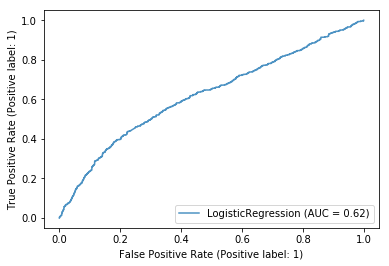

In [15]:
# LR

model = LogisticRegression(
    random_state=42
)

acc_score = []
f1 = []
recall = []
precision = []

k = 5
kf = KFold(n_splits=k, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc_score.append(accuracy_score(y_test, pred_values))
    f1.append(f1_score(y_test, pred_values))
    precision.append(precision_score(y_test, pred_values))
    recall.append(recall_score(y_test, pred_values))

ax = plt.gca()
lr_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
    
lr_avg_acc_score = sum(acc_score)/k
lr_avg_f1_score = sum(f1)/k
lr_avg_recall = sum(recall)/k
lr_avg_precision = sum(precision)/k

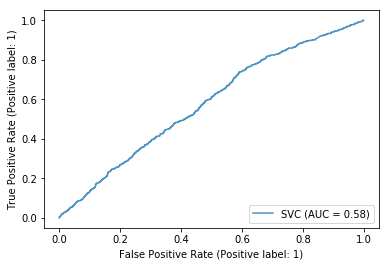

In [16]:
# SVM

model = svm.SVC(
    decision_function_shape='ovo'
)

acc_score = []
f1 = []
recall = []
precision = []

k = 5
kf = KFold(n_splits=k, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc_score.append(accuracy_score(y_test, pred_values))
    f1.append(f1_score(y_test, pred_values))
    precision.append(precision_score(y_test, pred_values))
    recall.append(recall_score(y_test, pred_values))

ax = plt.gca()
svm_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
    
svm_avg_acc_score = sum(acc_score)/k
svm_avg_f1_score = sum(f1)/k
svm_avg_recall = sum(recall)/k
svm_avg_precision = sum(precision)/k


Random forest classifier results:
Avg. acc. = 0.7434028555111365
Avg. F1 = 0.7123413275366436
Avg. recall = 0.6916490536904296
Avg. precision = 0.7346579202250095

LR classifier results:
Avg. acc. = 0.5943136493432325
Avg. F1 = 0.48647349224862807
Avg. recall = 0.4177888256602523
Avg. precision = 0.583240266443896

SVM classifier results:
Avg. acc. = 0.5389038753365425
Avg. F1 = 0.372235541982672
Avg. recall = 0.31733456865252285
Avg. precision = 0.500126586040385

Dummy classifier results:
Avg. acc. = 0.5403875010198254
Avg. F1 = 0.0
Avg. recall = 0.0
Avg. precision = 0.0



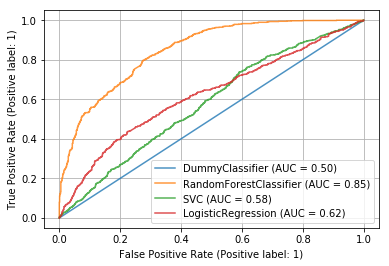

In [17]:
# Dummy Classifier

model = DummyClassifier(strategy="most_frequent")

acc_score = []
f1 = []
recall = []
precision = []

k = 5
kf = KFold(n_splits=k, shuffle=False)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
    
    acc_score.append(accuracy_score(y_test, pred_values))
    f1.append(f1_score(y_test, pred_values))
    precision.append(precision_score(y_test, pred_values))
    recall.append(recall_score(y_test, pred_values))

plt.grid()
ax = plt.gca()
d_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
rfc_disp.plot(ax=ax, alpha=0.8)
svm_disp.plot(ax=ax, alpha=0.8)
lr_disp.plot(ax=ax, alpha=0.8)
    
d_avg_acc_score = sum(acc_score)/k
d_avg_f1_score = sum(f1)/k
d_avg_recall = sum(recall)/k
d_avg_precision = sum(precision)/k

print(f"""
Random forest classifier results:
Avg. acc. = {rfc_avg_acc_score}
Avg. F1 = {rfc_avg_f1_score}
Avg. recall = {rfc_avg_recall}
Avg. precision = {rfc_avg_precision}

LR classifier results:
Avg. acc. = {lr_avg_acc_score}
Avg. F1 = {lr_avg_f1_score}
Avg. recall = {lr_avg_recall}
Avg. precision = {lr_avg_precision}

SVM classifier results:
Avg. acc. = {svm_avg_acc_score}
Avg. F1 = {svm_avg_f1_score}
Avg. recall = {svm_avg_recall}
Avg. precision = {svm_avg_precision}

Dummy classifier results:
Avg. acc. = {d_avg_acc_score}
Avg. F1 = {d_avg_f1_score}
Avg. recall = {d_avg_recall}
Avg. precision = {d_avg_precision}
""")

In [20]:
all_preds = [multi_doves_pred, multi_tueye_pred, multi_scrambled_pred]
all_y = [multi_doves_truey, multi_tueye_truey, multi_scrambled_truey]

In [21]:
np.save("combined_pred_values.npy", all_preds)
np.save("combined_y_values.npy", all_y)